In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Most-Recent-Cohorts-Institution_05192025.csv")

/var/folders/m2/d831zp0510xd8hvbm2_c8dp80000gn/T/ipykernel_91984/3532299851.py:1: DtypeWarning: Columns (9,1407,1408,1431,1432,1532,1537,1538,1539,1540,1542,1546,1589,1601,1602,1606,1608,1611,1614,1615,1616,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1653,1679,1690,1692,1697,1700,1702,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Most-Recent-Cohorts-Institution_05192025.csv")


In [6]:
for col in ["SAT_AVG", "ACTCM25", "ACTCM75", "MD_EARN_WNE_P10", "ADM_RATE", "UGDS"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["ACT_AVG"] = df[["ACTCM25", "ACTCM75"]].mean(axis=1)

Formatting

In [7]:
locale_names = {
    11: "City: Large",
    12: "City: Midsize",
    13: "City: Small",
    21: "Suburb: Large",
    22: "Suburb: Midsize",
    23: "Suburb: Small",
    31: "Town: Fringe",
    32: "Town: Distant",
    33: "Town: Remote",
    41: "Rural: Fringe",
    42: "Rural: Distant",
    43: "Rural: Remote",
}

control_names = {
    1: "Public",
    2: "Private Nonprofit",
    3: "Private For-Profit",
}

region_names = {
    0: "U.S. Service Schools",
    1: "New England",
    2: "Mid East",
    3: "Great Lakes",
    4: "Plains",
    5: "Southeast",
    6: "Southwest",
    7: "Rocky Mountains",
    8: "Far West",
    9: "Outlying Areas"
}

df["LOCALE_NAME"] = df["LOCALE"].map(locale_names)
df["CONTROL_NAME"] = df["CONTROL"].map(control_names)
df["REGION_NAME"] = df["REGION"].map(region_names)

Graphs

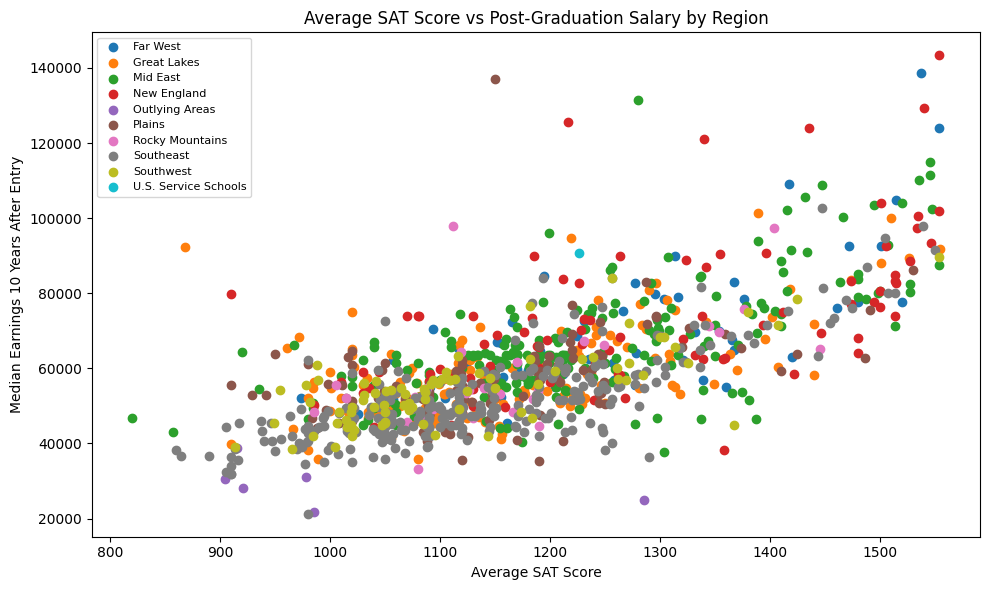

In [8]:
plt.figure(figsize=(10, 6))

for loc, subset in df.groupby("REGION_NAME"):
    plt.scatter(subset["SAT_AVG"], subset["MD_EARN_WNE_P10"], label=loc)

plt.xlabel("Average SAT Score")
plt.ylabel("Median Earnings 10 Years After Entry")
plt.title("Average SAT Score vs Post-Graduation Salary by Region")
plt.legend(loc="best", fontsize=8)
plt.tight_layout()
plt.show()

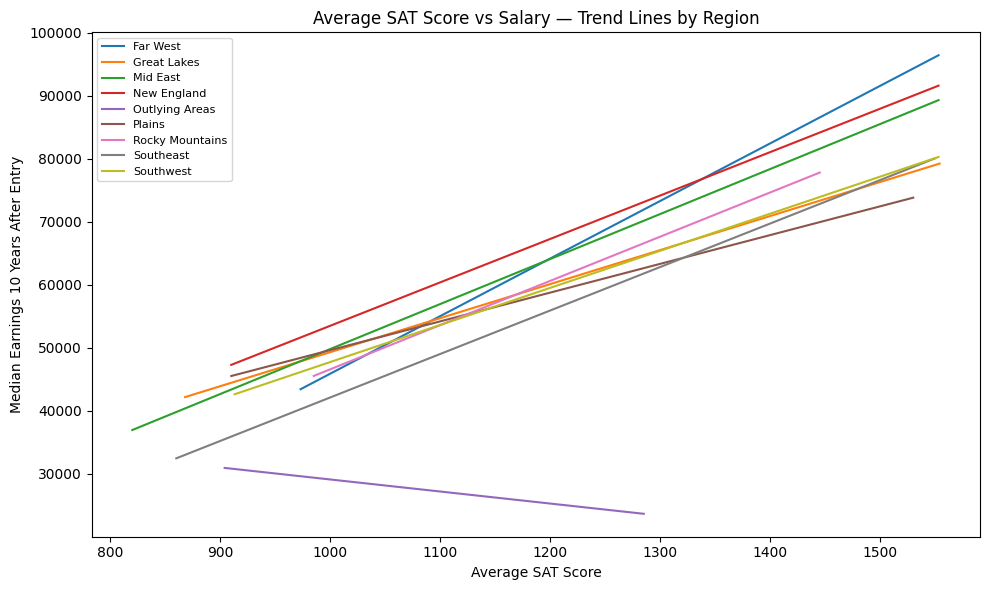

In [9]:
plt.figure(figsize=(10, 6))
for loc, subset in df.groupby("REGION_NAME"):
    sub = subset.dropna(subset=["SAT_AVG", "MD_EARN_WNE_P10"])
    if len(sub) < 5:
        continue
    x = sub["SAT_AVG"]
    y = sub["MD_EARN_WNE_P10"]
    m, b = np.polyfit(x, y, 1)
    xs = np.linspace(x.min(), x.max(), 100)
    ys = m * xs + b

    plt.plot(xs, ys, label=loc)

plt.xlabel("Average SAT Score")
plt.ylabel("Median Earnings 10 Years After Entry")
plt.title("Average SAT Score vs Salary — Trend Lines by Region")
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

In [10]:
print(df.shape)
df.head()

(6429, 3310)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,SCORECARD_SECTOR,ACT_AVG,LOCALE_NAME,CONTROL_NAME,REGION_NAME
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,47016.0,38892.0,41738.0,38167.0,40250.0,4,16.5,City: Midsize,Public,Southeast
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,54368.0,50488.0,51505.0,46559.0,59181.0,4,26.0,City: Midsize,Public,Southeast
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,NaN,NaN,38467.0,32654.0,49435.0,5,NaN,City: Midsize,Private Nonprofit,Southeast
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,62577.0,55920.0,60221.0,47787.0,67454.0,4,28.0,City: Midsize,Public,Southeast
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,37966.0,34294.0,31797.0,32303.0,36964.0,4,18.0,City: Midsize,Public,Southeast


In [11]:
#df = df_f.copy()

In [12]:
#Convert earnings to numeric
earn_cols = ["MD_EARN_WNE_P10", "MD_EARN_WNE_P6"]
for col in earn_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [13]:
df = df[(df["SAT_AVG"] >= 800) & (df["SAT_AVG"] <= 1600)]

In [15]:
df = df[df["UGDS"] >= 200]
df_clean = df.dropna(subset=["SAT_AVG", "MD_EARN_WNE_P10"])
df_clean.shape

(1042, 3310)

In [16]:
df_clean[["SAT_AVG", "MD_EARN_WNE_P10"]].describe()


,SAT_AVG,MD_EARN_WNE_P10
count,1042.000000,1042.000000
mean,1178.368522,59351.143954
std,143.840665,15476.010453
min,820.000000,21790.000000
25%,1080.000000,49059.500000
50%,1155.000000,56205.500000
75%,1256.000000,65718.750000
max,1554.000000,143372.000000


In [17]:
df_clean.groupby("REGION_NAME")[["SAT_AVG","MD_EARN_WNE_P10"]].mean().sort_values("SAT_AVG", ascending=False)

,SAT_AVG,MD_EARN_WNE_P10
REGION_NAME,,
New England,1272.797753,72319.415730
Far West,1265.836364,70210.509091
U.S. Service Schools,1226.000000,90610.000000
Mid East,1225.333333,65834.164384
Rocky Mountains,1171.111111,59324.814815
Great Lakes,1160.099415,57892.953216
Plains,1148.126126,56648.918919
Southeast,1139.181495,51874.448399
Southwest,1120.109756,54834.378049


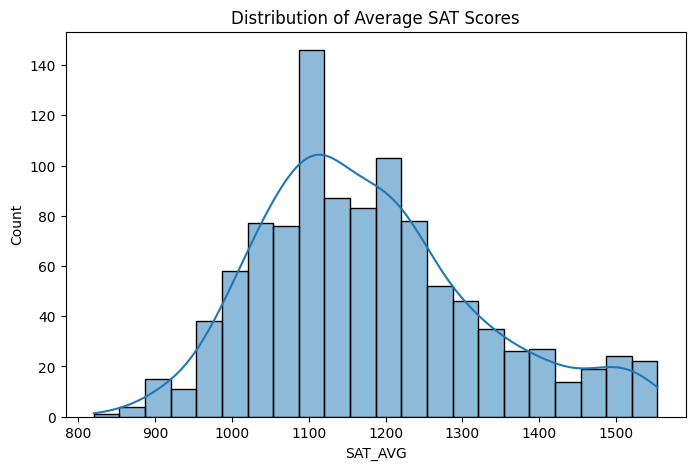

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["SAT_AVG"], kde=True)
plt.xlabel("SAT_AVG")
plt.title("Distribution of Average SAT Scores")
plt.show()


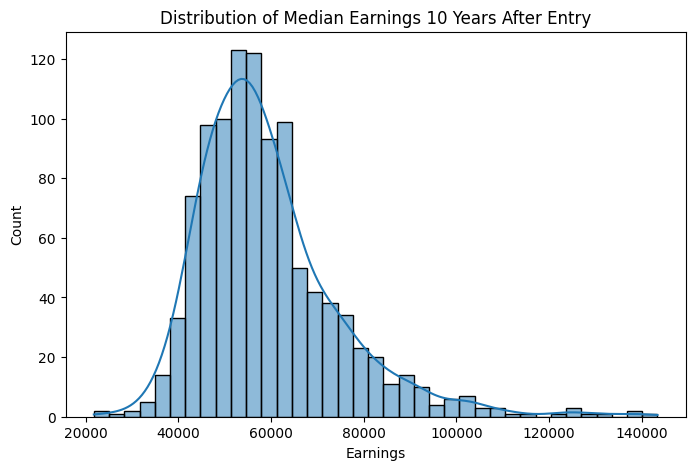

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["MD_EARN_WNE_P10"], kde=True)
plt.xlabel("Earnings")
plt.title("Distribution of Median Earnings 10 Years After Entry")
plt.show()


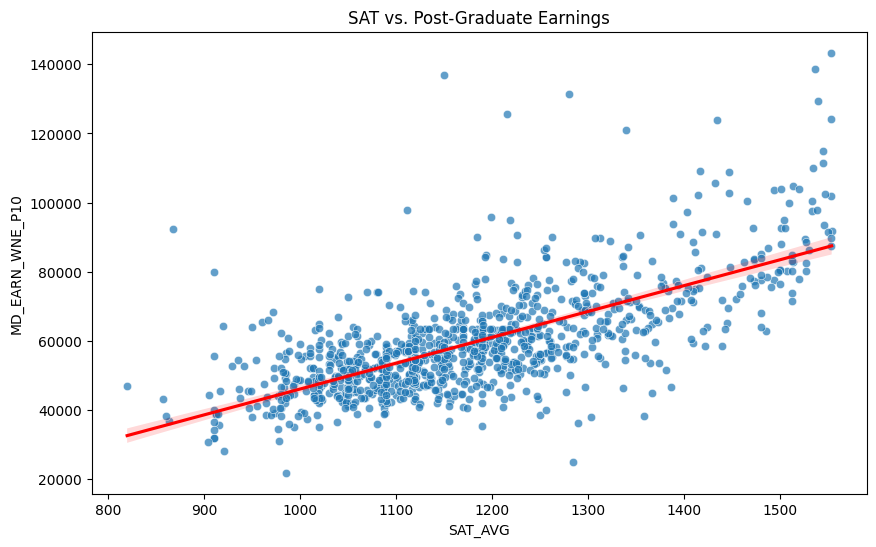

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean,x="SAT_AVG", y="MD_EARN_WNE_P10", alpha=0.7)
sns.regplot(data=df_clean, x="SAT_AVG", y="MD_EARN_WNE_P10",scatter=False,color="red")
plt.title("SAT vs. Post-Graduate Earnings")
plt.show()


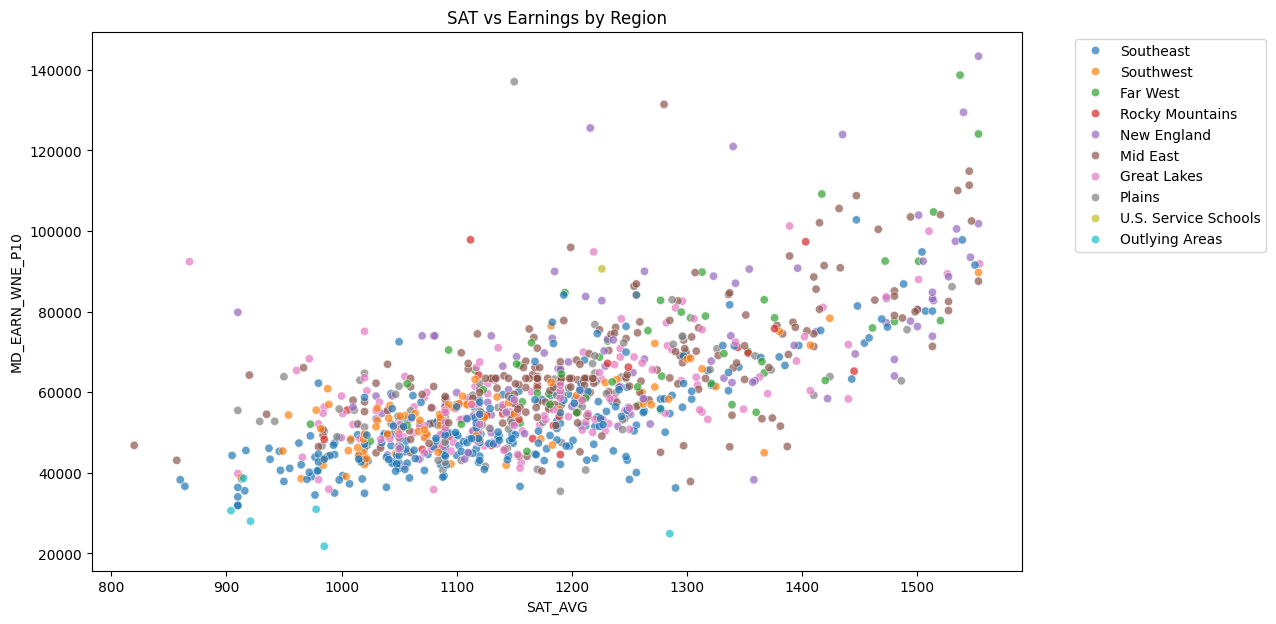

In [21]:
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=df_clean,
    x="SAT_AVG",
    y="MD_EARN_WNE_P10",
    hue="REGION_NAME",
    alpha=0.7
)
plt.title("SAT vs Earnings by Region")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


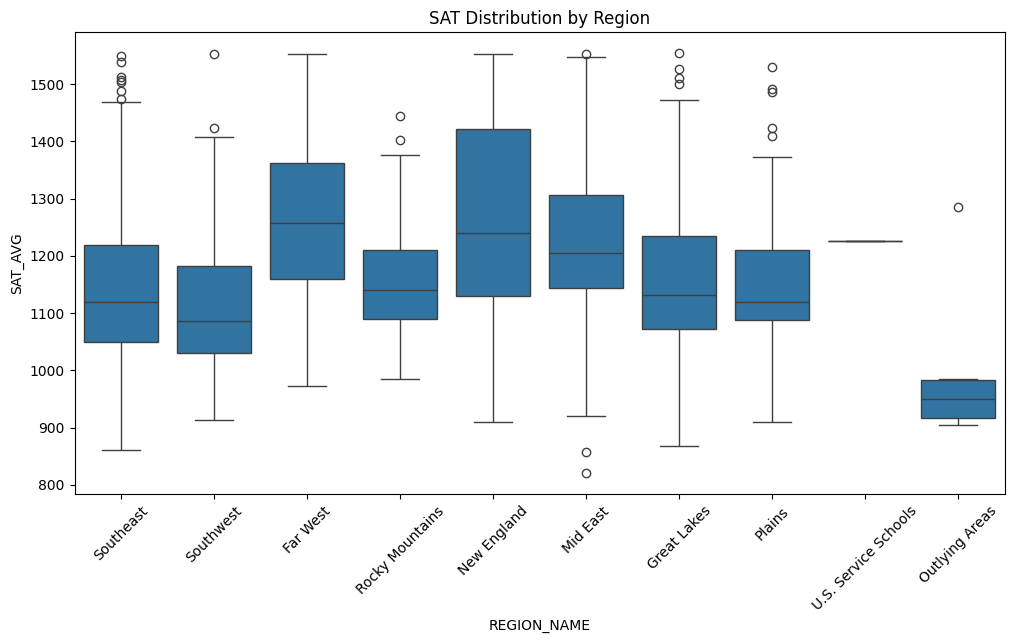

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean,x="REGION_NAME", y="SAT_AVG")
plt.xticks(rotation=45)
plt.title("SAT Distribution by Region")
plt.show()


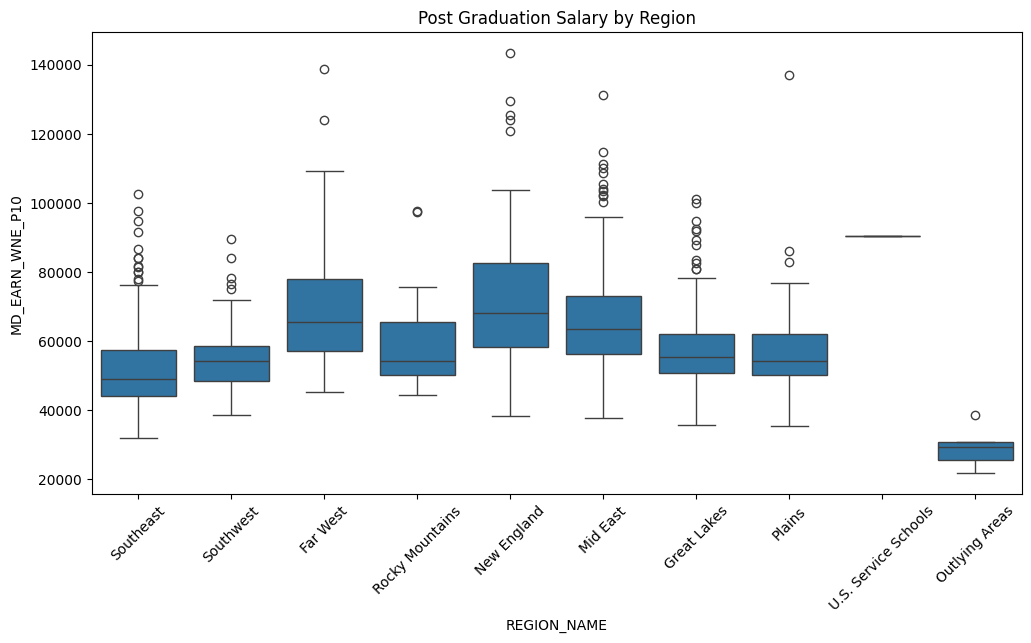

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean, x="REGION_NAME", y="MD_EARN_WNE_P10")
plt.xticks(rotation=45)
plt.title("Post Graduation Salary by Region")
plt.show()


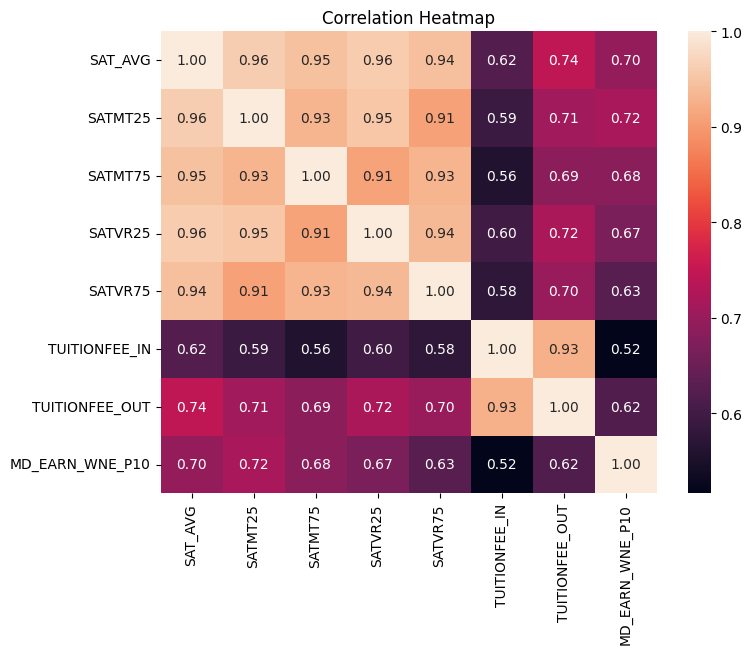

In [24]:
sub = df_clean[["SAT_AVG", "SATMT25", "SATMT75", "SATVR25", "SATVR75","TUITIONFEE_IN", "TUITIONFEE_OUT", "MD_EARN_WNE_P10"]]

plt.figure(figsize=(8,6))
sns.heatmap(sub.corr(), annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


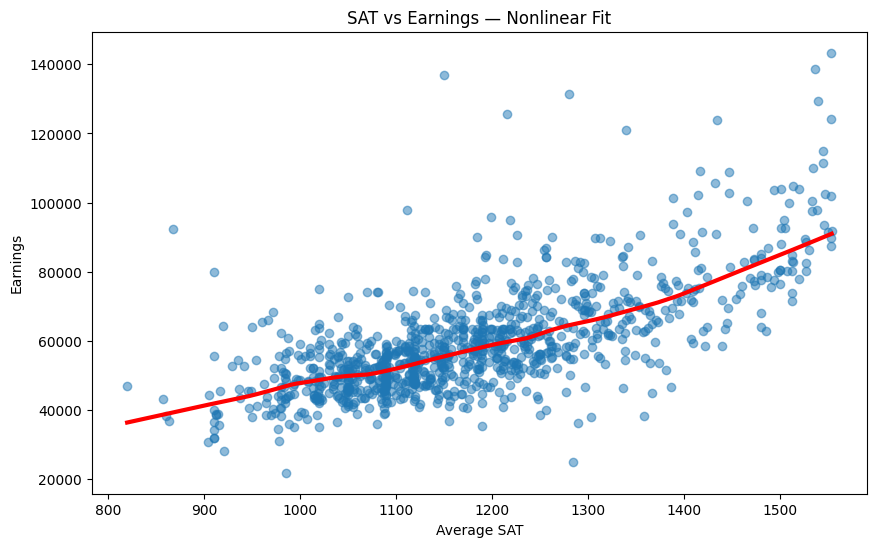

In [25]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(
    df_clean["MD_EARN_WNE_P10"],
    df_clean["SAT_AVG"],
    frac=0.3
)

plt.figure(figsize=(10,6))
plt.scatter(df_clean["SAT_AVG"], df_clean["MD_EARN_WNE_P10"], alpha=0.5)
plt.plot(lowess[:,0], lowess[:,1], color="red", linewidth=3)
plt.title("SAT vs Earnings — Nonlinear Fit")
plt.xlabel("Average SAT")
plt.ylabel("Earnings")
plt.show()


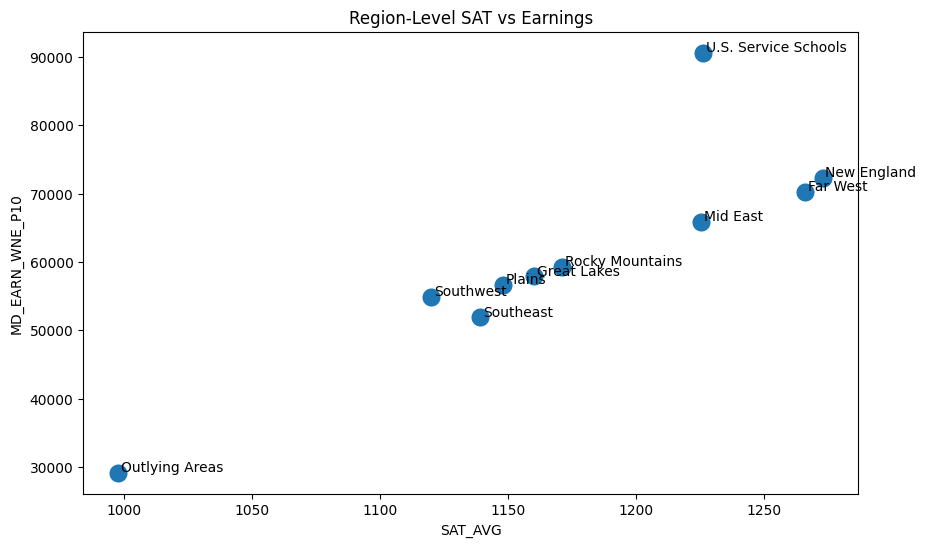

In [26]:
region_summary = (df_clean.groupby("REGION_NAME")[["SAT_AVG", "MD_EARN_WNE_P10"]].mean().reset_index()
)

plt.figure(figsize=(10,6))
sns.scatterplot(data=region_summary, x="SAT_AVG", y="MD_EARN_WNE_P10", s=200)
for _, row in region_summary.iterrows():
    plt.text(row["SAT_AVG"]+1, row["MD_EARN_WNE_P10"]+200, row["REGION_NAME"])

plt.title("Region-Level SAT vs Earnings")
plt.show()


In [27]:
# save cleaned data
df_clean.to_csv("cleaned_data.csv", index=False)